In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# import the data set
ifood=pd.read_csv('/content/DataBootcamp - ifood_marketing data.csv')
ifood.info()
ifood.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


#Data Cleaning: Data Transform & Missing Values

In [124]:
# clean up column names that contain whitespace
ifood.columns = ifood.columns.str.replace(' ', '')

# transform Income column to a numerical
ifood['Income'] = ifood['Income'].str.replace('$', '')
ifood['Income'] = ifood['Income'].str.replace(',', '').astype('float')

In [125]:
#Transform Dt_Customer to datetime:
ifood['Dt_Customer'] = pd.to_datetime(ifood['Dt_Customer'])

# Dependents
ifood['Dependents'] = ifood['Kidhome'] + ifood['Teenhome']

# Year becoming a Customer
ifood['Year_Customer'] = pd.DatetimeIndex(ifood['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in ifood.columns if 'Mnt' in col]
ifood['TotalMnt'] = ifood[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in ifood.columns if 'Purchases' in col]
ifood['TotalPurchases'] = ifood[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in ifood.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
ifood['TotalCampaignsAcc'] = ifood[campaigns_cols].sum(axis=1)

# view new features, by customer ID
ifood[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()


<ipython-input-125-f6f8d737992e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ifood['Dt_Customer'] = pd.to_datetime(ifood['Dt_Customer'])


,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


In [126]:
#Checking the missing values
ifood.isnull().sum().sort_values(ascending=False)

,0
Income,24
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Dealing null values: create two histograms to compare whether dropping the null values will affect the overal distribution of Income. (No, drop the missing values)**

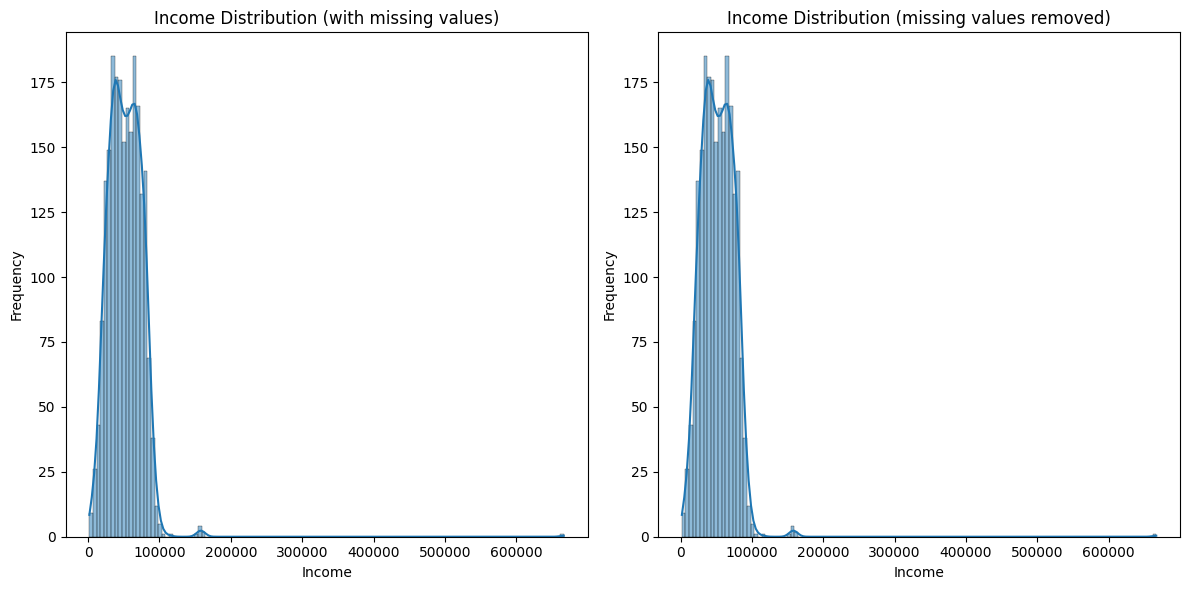

In [127]:
plt.figure(figsize=(12, 6))

# Histogram for the original data with missing values
plt.subplot(1, 2, 1)
sns.histplot(ifood['Income'], kde=True)
plt.title('Income Distribution (with missing values)')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Histogram for the data after dropping missing values
plt.subplot(1, 2, 2)
sns.histplot(ifood.dropna(subset=['Income'])['Income'], kde=True)
plt.title('Income Distribution (missing values removed)')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [128]:
ifood.dropna(subset=['Income'], inplace=True)
ifood.isnull().sum().sort_values(ascending=False)

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Outlier Analysis**: Age and Income

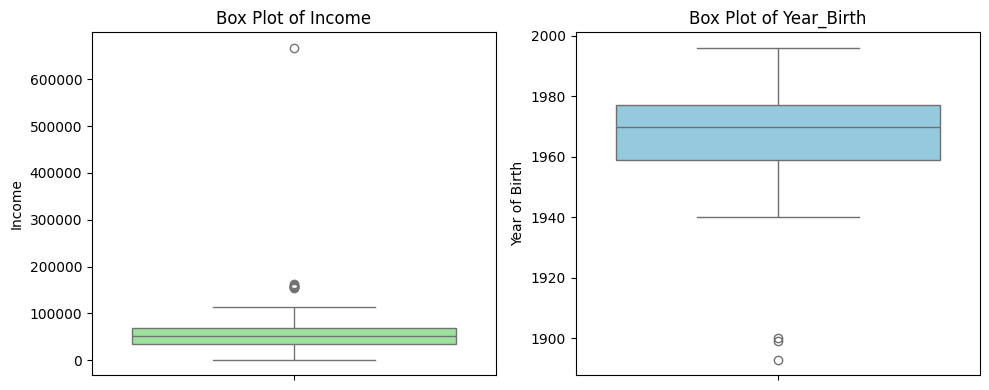

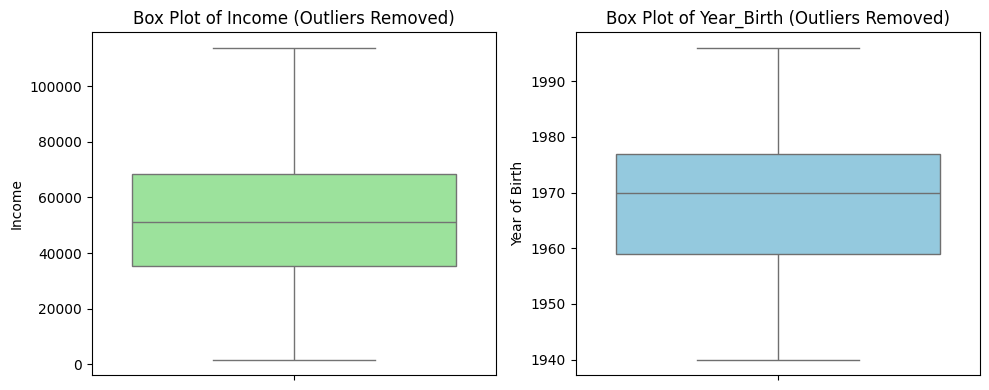

Number of rows before outlier removal: 2216
Number of rows after outlier removal for Year_Birth: 2213
Number of rows after outlier removal for Income: 2208


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Create box plots for Year_Birth and Income
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=ifood['Income'], color='lightgreen')
plt.title('Box Plot of Income')
plt.ylabel('Income')

plt.subplot(1, 2, 2)
sns.boxplot(y=ifood['Year_Birth'], color='skyblue')
plt.title('Box Plot of Year_Birth')
plt.ylabel('Year of Birth')

plt.tight_layout()
plt.show()

# Remove outliers from Year_Birth and Income using IQR
ifood_no_outliers_year = remove_outliers_iqr(ifood, 'Year_Birth')
ifood_no_outliers_income = remove_outliers_iqr(ifood, 'Income')

# Create box plots after outlier removal
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

sns.boxplot(y=ifood_no_outliers_income['Income'], color='lightgreen')
plt.title('Box Plot of Income (Outliers Removed)')
plt.ylabel('Income')

plt.subplot(1, 2, 2)
sns.boxplot(y=ifood_no_outliers_year['Year_Birth'], color='skyblue')
plt.title('Box Plot of Year_Birth (Outliers Removed)')
plt.ylabel('Year of Birth')



plt.tight_layout()
plt.show()


print("Number of rows before outlier removal:", len(ifood))
print("Number of rows after outlier removal for Year_Birth:", len(ifood_no_outliers_year))
print("Number of rows after outlier removal for Income:", len(ifood_no_outliers_income))




# EDA

3. Univariate Analysis (w/ Response)
Goal: Identify which single features separate responders from non-responders.
For each numeric feature (Recency, Age, Income, TotalMnt, TotalPurchases, etc.):


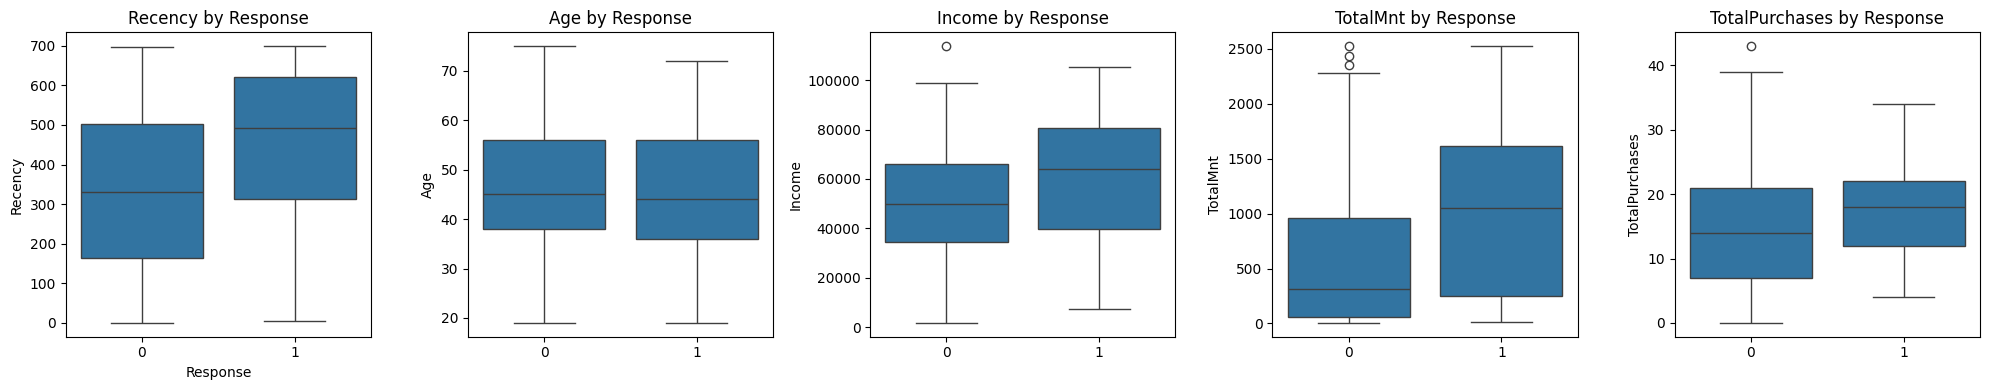

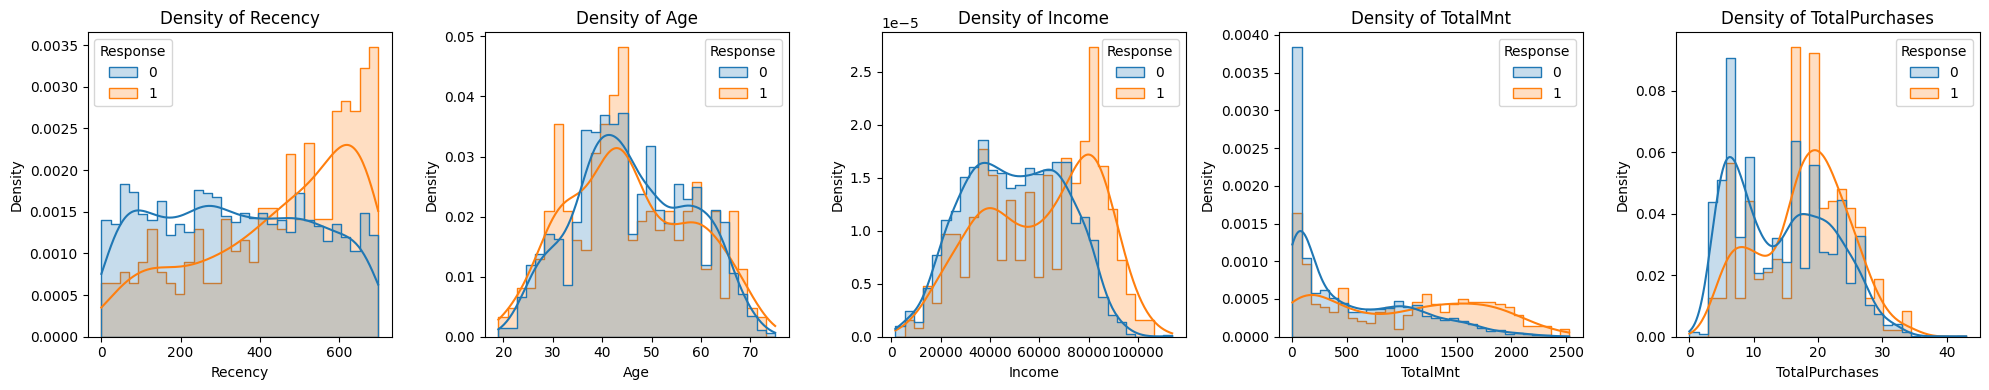

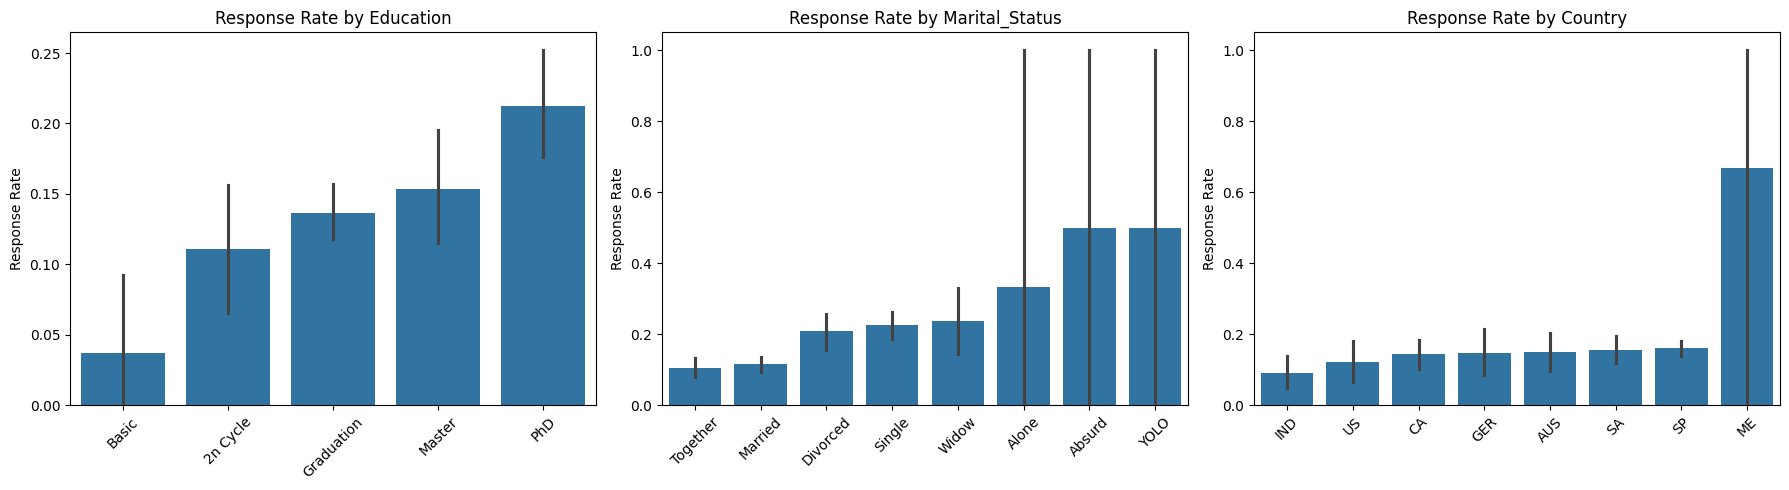

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

ifood_no_outliers['Age'] = 2015 - ifood_no_outliers['Year_Birth']

# 2. Define feature lists
num_feats = ['Recency', 'Age', 'Income', 'TotalMnt', 'TotalPurchases']
cat_feats = ['Education', 'Marital_Status', 'Country']

# 3. Numeric boxplots
fig, axes = plt.subplots(1, len(num_feats), figsize=(20, 4), sharey=False)
for ax, col in zip(axes, num_feats):
    sns.boxplot(x='Response', y=col, data=ifood_no_outliers, ax=ax)
    ax.set_title(f'{col} by Response')
    ax.set_xlabel('')
    ax.set_ylabel(col)
axes[0].set_xlabel('Response')
plt.tight_layout()
plt.show()

# 4. Numeric density plots
fig, axes = plt.subplots(1, len(num_feats), figsize=(20, 4), sharey=False)
for ax, col in zip(axes, num_feats):
    sns.histplot(ifood_no_outliers, x=col, hue='Response', stat='density',
                 common_norm=False, bins=30, element='step', kde=True, ax=ax)
    ax.set_title(f'Density of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
plt.tight_layout()
plt.show()

# 5. Categorical response-rate bar charts
fig, axes = plt.subplots(1, len(cat_feats), figsize=(18, 5))
for ax, col in zip(axes, cat_feats):
    order = ifood_no_outliers.groupby(col)['Response'].mean().sort_values().index
    sns.barplot(x=col, y='Response', data=ifood_no_outliers, order=order, ax=ax)
    ax.set_title(f'Response Rate by {col}')
    ax.set_ylabel('Response Rate')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



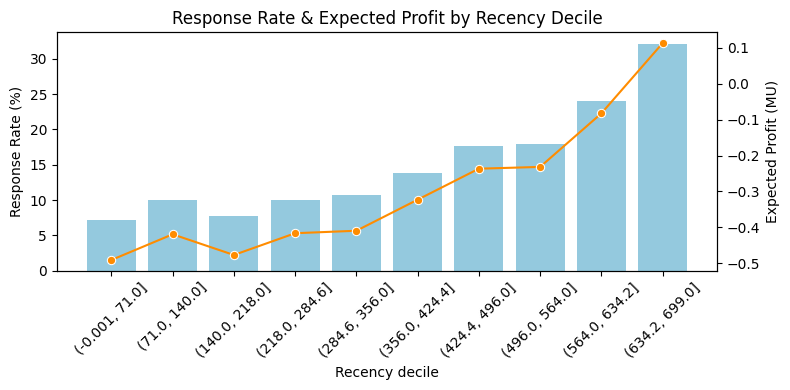

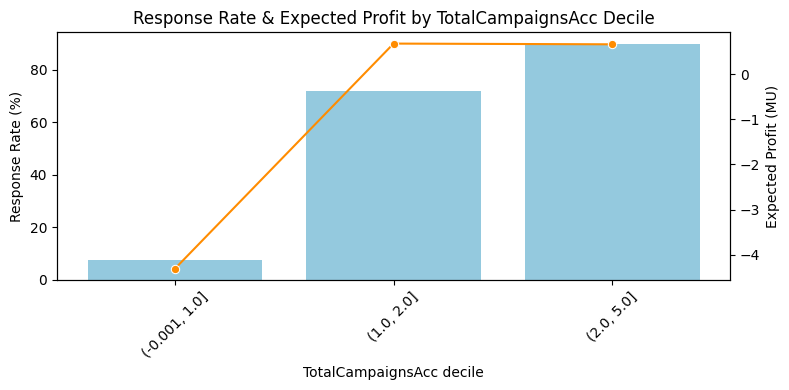

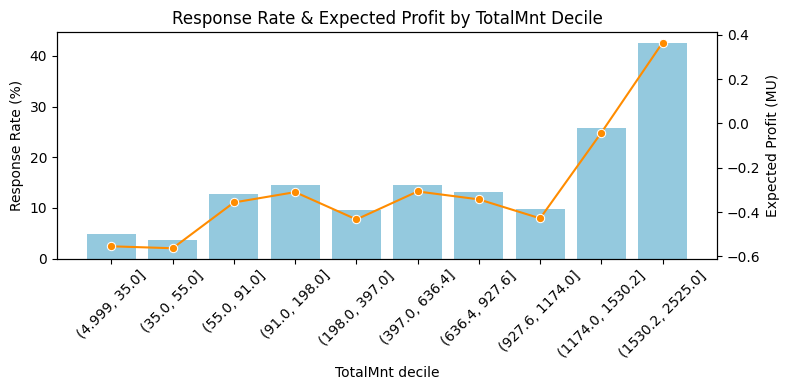

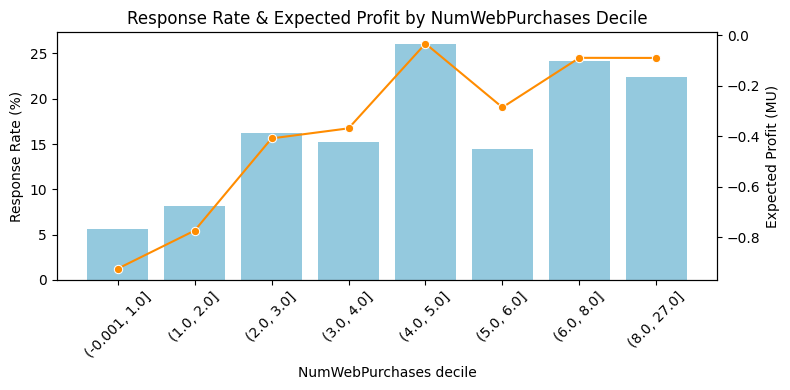

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assumes `ifood_no_outliers` DataFrame with Response and numeric/categorical columns

# --- Section 4: Binned Response‐Rate & Profit Analysis ---

# 1. Define features and profit constants
bin_feats = ['Recency', 'TotalCampaignsAcc', 'TotalMnt', 'NumWebPurchases']
cost_per_contact  = 6.720  / 2240
rev_per_positive  = 3.674  / (2240 * 0.15)
profit_pos = rev_per_positive - cost_per_contact
loss_neg   = - cost_per_contact
n_bins     = 10

# 2. Loop over features
for col in bin_feats:
    df = ifood_no_outliers.copy()
    df[col+'_bin'] = pd.qcut(df[col], q=n_bins, duplicates='drop')
    bins = df[col+'_bin'].cat.categories

    resp_rates = []
    profits    = []
    for b in bins:
        sub = df[df[col+'_bin']==b]
        r = sub['Response'].mean()*100
        resp_rates.append(r)
        tp = sub['Response'].sum()
        fp = len(sub)-tp
        profits.append(tp*profit_pos + fp*loss_neg)

    fig, ax1 = plt.subplots(figsize=(8,4))
    sns.barplot(x=[str(b) for b in bins], y=resp_rates, ax=ax1, color='skyblue')
    ax1.set_xlabel(f'{col} decile')
    ax1.set_ylabel('Response Rate (%)')
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    sns.lineplot(x=[str(b) for b in bins], y=profits, marker='o', ax=ax2, color='darkorange')
    ax2.set_ylabel('Expected Profit (MU)')

    plt.title(f'Response Rate & Expected Profit by {col} Decile')
    plt.tight_layout()
    plt.show()


<ipython-input-132-633c86b1f044>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby('PastAccepts_grp')['Response'].mean().mul(100)


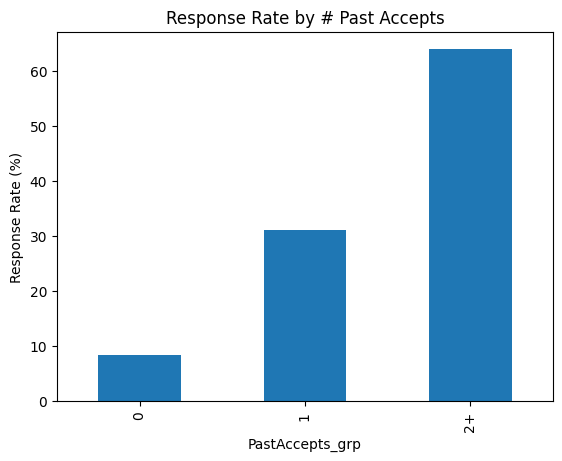

In [132]:

# 5.2 Response rate vs. TotalPastAccepts (0,1,2+)
df['TotalPastAccepts'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                             'AcceptedCmp4','AcceptedCmp5']].sum(axis=1)
df['PastAccepts_grp'] = pd.cut(df['TotalPastAccepts'], bins=[-1,0,1, np.inf],
                               labels=['0','1','2+'])
grp = df.groupby('PastAccepts_grp')['Response'].mean().mul(100)
grp.plot.bar()
plt.ylabel('Response Rate (%)')
plt.title('Response Rate by # Past Accepts')
plt.show()

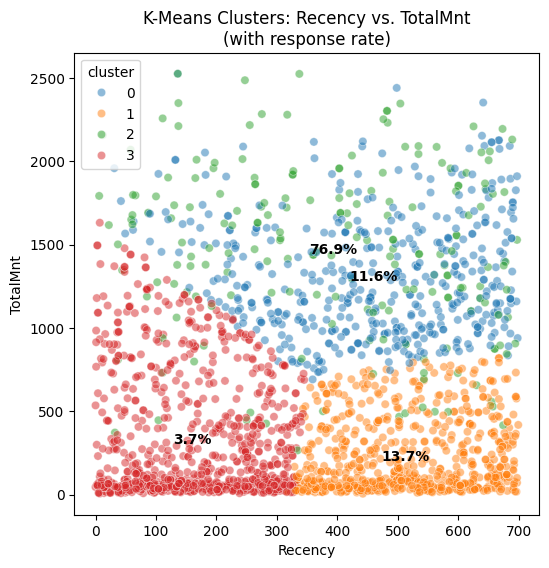

Cluster profiles:
             Recency  TotalCampaignsAcc     TotalMnt  response_rate
cluster                                                           
0        459.293103           0.327586  1306.265086      11.637931
1        512.642857           0.217201   231.223032      13.702624
2        393.497487           2.768844  1471.944724      76.884422
3        159.880841           0.164720   327.568925       3.738318


In [133]:

# 5.3 (Optional) K-Means clustering on [Recency, TotalPastAccepts, TotalMnt]
cluster_feats = ['Recency','TotalCampaignsAcc','TotalMnt']
scaler = StandardScaler()
Xc = scaler.fit_transform(df[cluster_feats])
kmeans = KMeans(n_clusters=4, random_state=42).fit(Xc)
df['cluster'] = kmeans.labels_

# Scatter with cluster and response-rate annotation
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(6,6))
sns.scatterplot(x='Recency', y='TotalMnt', hue='cluster',
                data=df, palette='tab10', alpha=0.5)
for i, (r, m) in enumerate(zip(centers[:,0], centers[:,2])):
    rate = df.loc[df['cluster']==i,'Response'].mean()*100
    plt.text(r, m, f'{rate:.1f}%', ha='center', va='center', weight='bold')
plt.title('K-Means Clusters: Recency vs. TotalMnt\n(with response rate)')
plt.show()

# Cluster profiles table
profile = df.groupby('cluster')[cluster_feats + ['Response']].mean()
profile['response_rate'] = profile['Response']*100
print("Cluster profiles:\n", profile.drop(columns='Response'))



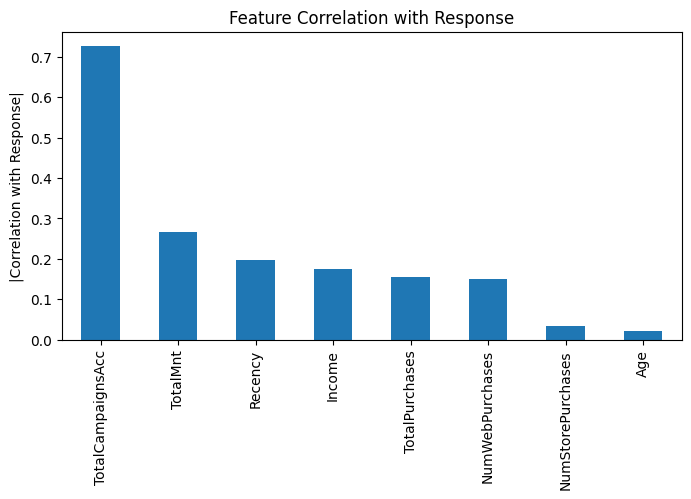

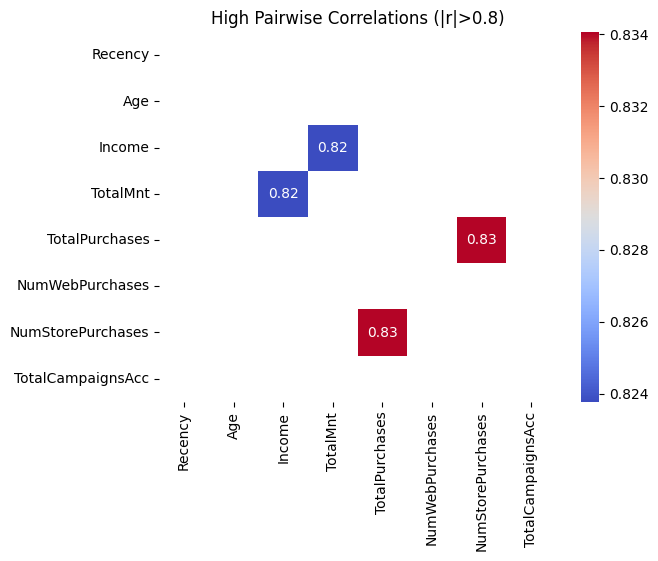

In [134]:
# --- Section 6: Correlation with Response & Redundancy Check ---

# 6.1 Correlation with Response
num_feats = ['Recency','Age','Income','TotalMnt','TotalPurchases',
             'NumWebPurchases','NumStorePurchases','TotalCampaignsAcc']
corr = df[num_feats].corrwith(df['Response']).abs().sort_values(ascending=False)
corr.plot.bar(figsize=(8,4))
plt.ylabel('|Correlation with Response|')
plt.title('Feature Correlation with Response')
plt.show()

# 6.2 Pairwise correlation heatmap (highlight |r|>0.8)
pair_corr = df[num_feats].corr().abs()
mask = (pair_corr < 0.8) | (np.eye(len(num_feats),dtype=bool))
sns.heatmap(pair_corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('High Pairwise Correlations (|r|>0.8)')
plt.show()

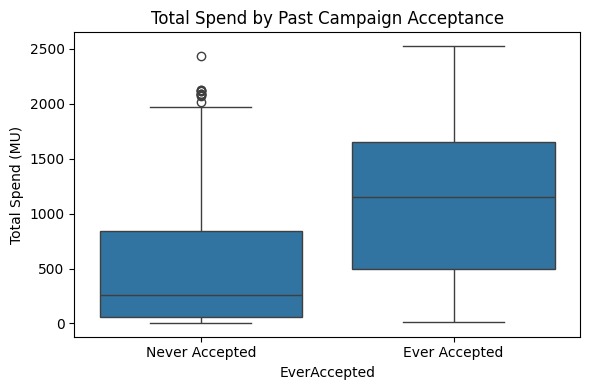

Spend summary by past-accept group:
                        mean  median  count
Never Accepted   479.606754   257.0   1747
Ever Accepted   1092.072052  1153.5    458


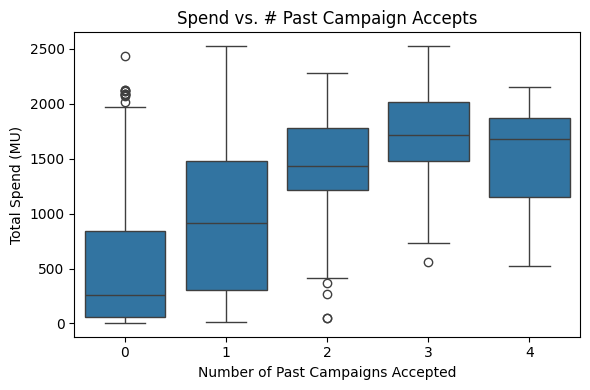

Correlation between # past accepts and total spend: 0.458


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Create a flag for “ever accepted a past campaign”
ifood_no_outliers['EverAccepted'] = ifood_no_outliers[
    ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
].max(axis=1)

# 2. Boxplot of TotalMnt by EverAccepted
plt.figure(figsize=(6,4))
sns.boxplot(x='EverAccepted', y='TotalMnt', data=ifood_no_outliers)
plt.xticks([0,1], ['Never Accepted','Ever Accepted'])
plt.ylabel('Total Spend (MU)')
plt.title('Total Spend by Past Campaign Acceptance')
plt.tight_layout()
plt.show()

# 3. Mean & median spend for each group
grouped = ifood_no_outliers.groupby('EverAccepted')['TotalMnt'] \
    .agg(['mean','median','count'])
grouped.index = ['Never Accepted','Ever Accepted']
print("Spend summary by past-accept group:\n", grouped)

# 4. Scatter of TotalMnt vs. #PastAccepts
ifood_no_outliers['NumPastAccepts'] = ifood_no_outliers[
    ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
].sum(axis=1)

plt.figure(figsize=(6,4))
sns.boxplot(x='NumPastAccepts', y='TotalMnt', data=ifood_no_outliers)
plt.xlabel('Number of Past Campaigns Accepted')
plt.ylabel('Total Spend (MU)')
plt.title('Spend vs. # Past Campaign Accepts')
plt.tight_layout()
plt.show()

# 5. Correlation test
corr = np.corrcoef(ifood_no_outliers['NumPastAccepts'], ifood_no_outliers['TotalMnt'])[0,1]
print(f"Correlation between # past accepts and total spend: {corr:.3f}")


# Predictive Analysis

In [136]:
ifood_no_outliers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc',
       'LoyalCustomer', 'Age', 'EverAccepted', 'NumPastAccepts'],
      dtype='object')

In [137]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# 2. Define X and y
df = ifood_no_outliers.copy()
X = df.drop([
    "ID","Dt_Customer","Response",
    "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3",
    "AcceptedCmp4","AcceptedCmp5"
], axis=1)
y = df["Response"]

# 3. Numeric and categorical columns
num_cols = [
    "Year_Birth","Income","Kidhome","Teenhome","Recency",
    "MntWines","MntFruits","MntMeatProducts","MntFishProducts",
    "MntSweetProducts","MntGoldProds","NumDealsPurchases",
    "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
    "NumWebVisitsMonth","Dependents","Year_Customer",
    "TotalMnt","TotalPurchases","TotalCampaignsAcc","LoyalCustomer"
]
cat_cols = ["Education","Marital_Status","Country"]

# 4. Train/validation split (stratified)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Preprocessing pipelines with imputation
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe",     OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
], remainder="drop")

# 6. Candidate models and hyperparameter grids
models = {
    "logistic": LogisticRegression(solver="liblinear", max_iter=500),
    "knn":       KNeighborsClassifier(),
    "tree":      DecisionTreeClassifier(random_state=42),
    "rf":        RandomForestClassifier(random_state=42),
    "xgb":       xgb.XGBClassifier(eval_metric="logloss", random_state=42)
}

param_grids = {
    "logistic": {
        "classifier__C": [0.01, 0.1, 1, 10]
    },
    "knn": {
        "classifier__n_neighbors": [3,5,7,9],
        "classifier__weights":     ["uniform","distance"]
    },
    "tree": {
        "classifier__max_depth":       [3,5,7,None],
        "classifier__min_samples_leaf":[1,5,10]
    },
    "rf": {
        "classifier__n_estimators": [100,200],
        "classifier__max_depth":    [5,10,None]
    },
    "xgb": {
        "classifier__n_estimators":  [100,200],
        "classifier__max_depth":     [3,5],
        "classifier__learning_rate": [0.01,0.1]
    }
}

# 7. GridSearchCV with 5-fold Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier",    model)
    ])
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=cv,
        scoring="roc_auc",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    results.append({
        "model":       name,
        "best_auc":    grid.best_score_,
        "best_params": grid.best_params_
    })

# 8. Summarize results
res_df = pd.DataFrame(results).sort_values("best_auc", ascending=False)
print(res_df)


      model  best_auc                                        best_params
4       xgb  0.987217  {'classifier__learning_rate': 0.1, 'classifier...
0  logistic  0.979051                             {'classifier__C': 0.1}
3        rf  0.976809  {'classifier__max_depth': 10, 'classifier__n_e...
2      tree  0.960663  {'classifier__max_depth': 3, 'classifier__min_...
1       knn  0.907550  {'classifier__n_neighbors': 9, 'classifier__we...


In [145]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# 1. Re‐train each model on the full training set with its best hyperparameters
trained_pipelines = {}
for res in results:
    name        = res['model']
    best_params = res['best_params']

    # Strip the "classifier__" prefix from each param name
    clf_params = {param.split("__")[1]: val for param, val in best_params.items()}
    clf = models[name].set_params(**clf_params)

    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier",    clf)
    ])
    pipe.fit(X_train, y_train)
    trained_pipelines[name] = pipe

# 2. Evaluate on the unseen validation set
eval_results = []
for name, pipe in trained_pipelines.items():
    # Predict probabilities and labels
    y_proba = pipe.predict_proba(X_val)[:, 1]
    y_pred  = pipe.predict(X_val)

    # Compute metrics
    auc   = roc_auc_score(y_val, y_proba)
    prec  = precision_score(y_val, y_pred)
    rec   = recall_score(y_val, y_pred)
    f1    = f1_score(y_val, y_pred)

    eval_results.append({
        "model":    name,
        "ROC-AUC":  auc,
        "Precision":prec,
        "Recall":   rec,
        "F1-score": f1
    })

# 3. Summarize and rank
eval_df = pd.DataFrame(eval_results).sort_values("ROC-AUC", ascending=False)
print("Validation Performance of All Models:")
print(eval_df)


Validation Performance of All Models:
      model   ROC-AUC  Precision    Recall  F1-score
4       xgb  0.988267   0.890625  0.850746  0.870229
0  logistic  0.986870   0.938776  0.686567  0.793103
3        rf  0.984396   0.914894  0.641791  0.754386
2      tree  0.969630   0.697674  0.895522  0.784314
1       knn  0.960392   0.885714  0.462687  0.607843


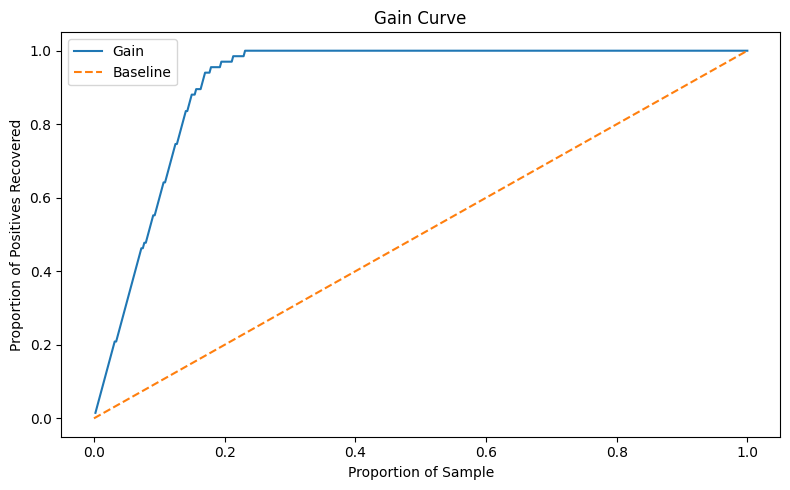

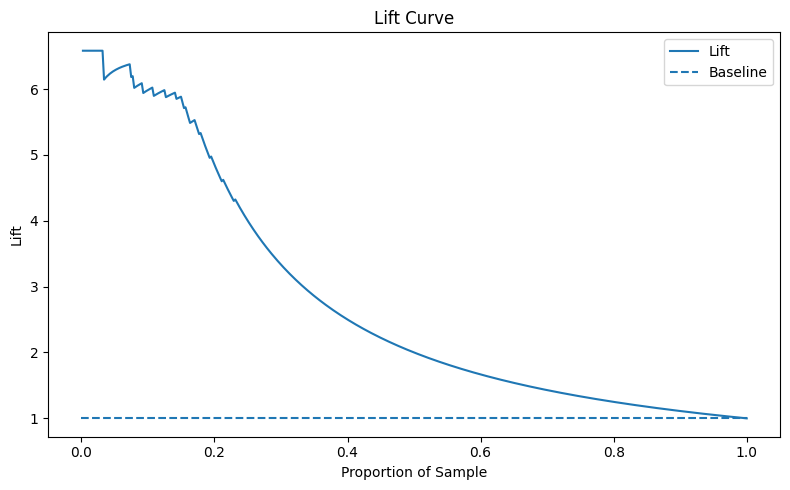

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Assume y_val (true binary labels) and proba_val (predicted probabilities) are already defined:
# y_val: array-like of 0/1, proba_val: array-like of floats in [0,1]
# 1. Extract the best XGB pipeline
best_xgb = [r for r in results if r["model"]=="xgb"][0]
# Assuming you have the fitted GridSearchCV for XGB:
best_model = grid  # replace with your XGB GridSearchCV instance

# 2. Predict probabilities on the validation set
proba_val = best_model.predict_proba(X_val)[:, 1]

# Convert to numpy arrays
y_true = np.asarray(y_val)
y_score = np.asarray(proba_val)

# Sort instances by descending score
order = np.argsort(y_score)[::-1]
y_true_sorted = y_true[order]

# Cumulative number of positives recovered
cum_positives = np.cumsum(y_true_sorted)
total_positives = cum_positives[-1]

# Proportion of sample and gain
pct_sample = np.arange(1, len(y_true_sorted) + 1) / len(y_true_sorted)
gain = cum_positives / total_positives

# Compute lift
lift = gain / pct_sample

# Plot Gain Curve
plt.figure(figsize=(8, 5))
plt.plot(pct_sample, gain, label="Gain")
plt.plot([0, 1], [0, 1], linestyle="--", label="Baseline")
plt.xlabel("Proportion of Sample")
plt.ylabel("Proportion of Positives Recovered")
plt.title("Gain Curve")
plt.legend()
plt.tight_layout()
plt.show()

# Plot Lift Curve
plt.figure(figsize=(8, 5))
plt.plot(pct_sample, lift, label="Lift")
plt.hlines(1, 0, 1, linestyles="--", label="Baseline")
plt.xlabel("Proportion of Sample")
plt.ylabel("Lift")
plt.title("Lift Curve")
plt.legend()
plt.tight_layout()
plt.show()


Optimal threshold = 0.30, Expected profit = 0.5 MU


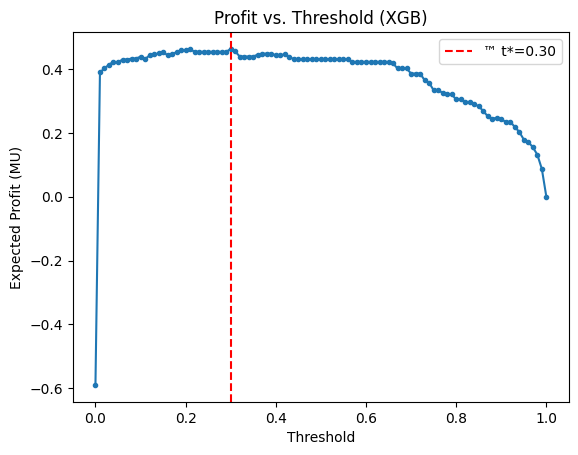

Customers to target next month: 352


In [139]:
# 1. Extract the best XGB pipeline
best_xgb = [r for r in results if r["model"]=="xgb"][0]
# (If you kept the GridSearchCV object as `grid`, you can also do:)
# best_model = grid.best_estimator_

# Assuming you have the fitted GridSearchCV for XGB:
best_model = grid  # replace with your XGB GridSearchCV instance

# 2. Predict probabilities on the validation set
proba_val = best_model.predict_proba(X_val)[:, 1]

# 3. Define profit constants (MU per customer)
cost_per_contact    = 6.720  / 2240
rev_per_positive    = 3.674  / (2240 * 0.15)
profit_per_positive = rev_per_positive - cost_per_contact
loss_per_negative   = - cost_per_contact

def expected_profit(y_true, y_score, thresh):
    preds = (y_score >= thresh).astype(int)
    tp = ((preds==1) & (y_true==1)).sum()
    fp = ((preds==1) & (y_true==0)).sum()
    return tp*profit_per_positive + fp*loss_per_negative

# 4. Sweep thresholds
thresholds = np.linspace(0,1,101)
profits   = [expected_profit(y_val.values, proba_val, t) for t in thresholds]

# 5. Find optimal threshold
best_i      = np.argmax(profits)
best_thresh = thresholds[best_i]
best_profit = profits[best_i]
print(f"Optimal threshold = {best_thresh:.2f}, Expected profit = {best_profit:.1f} MU")

# 6. (Optional) Plot profit curve
import matplotlib.pyplot as plt
plt.plot(thresholds, profits, marker='.')
plt.axvline(best_thresh, color='red', linestyle='--',
            label=f"™ t*={best_thresh:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Expected Profit (MU)")
plt.title("Profit vs. Threshold (XGB)")
plt.legend()
plt.show()

# 7. Apply to full dataset
proba_all = best_model.predict_proba(X)[:,1]
selected = df.loc[proba_all >= best_thresh]
print("Customers to target next month:", selected.shape[0])


In [140]:
import numpy as np

# 1. Predict probabilities on the full dataset
proba_all = best_model.predict_proba(X)[:, 1]

# 2. Define profit constants (MU per customer)
cost_per_contact    = 6.720  / 2240
rev_per_positive    = 3.674  / (2240 * 0.15)
profit_per_positive = rev_per_positive - cost_per_contact
loss_per_negative   = - cost_per_contact

# 3. Build ranking DataFrame
df_rank = ifood_no_outliers.copy()
df_rank["proba"] = proba_all

# 4. Sort by descending probability
df_rank = df_rank.sort_values("proba", ascending=False).reset_index(drop=True)

# 5. Compute per-customer profit
df_rank["profit"] = np.where(
    df_rank["Response"] == 1,
    profit_per_positive,
    loss_per_negative
)

# 6. Compute cumulative profit
df_rank["cum_profit"] = df_rank["profit"].cumsum()

# 7. Find the optimal cutoff
idx_max = df_rank["cum_profit"].idxmax()
optimal_count = idx_max + 1
optimal_fraction = optimal_count / len(df_rank)

print(f"Optimal number of customers to contact: {optimal_count}")
print(f"Which is {optimal_fraction:.1%} of the entire base")
print(f"Maximum cumulative profit: {df_rank.loc[idx_max, 'cum_profit']:.2f} MU")

# 8. (Optional) Extract that slice
best_slice = df_rank.iloc[:optimal_count]

# 9. the ideal customer base that we should target in the next campaigns
target_df = df_rank.iloc[:optimal_count].copy()
target_df

Optimal number of customers to contact: 340
Which is 15.4% of the entire base
Maximum cumulative profit: 2.54 MU


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,TotalMnt,TotalPurchases,TotalCampaignsAcc,LoyalCustomer,Age,EverAccepted,NumPastAccepts,proba,profit,cum_profit
0,7872,1975,PhD,Married,86836.0,0,0,2012-09-12,655,179,...,557,23,4,False,40,1,3,0.999863,0.007935,0.007935
1,6906,1953,Master,Widow,84953.0,0,0,2013-06-03,391,167,...,1024,18,4,False,62,1,3,0.999853,0.007935,0.015869
2,10446,1957,PhD,Married,82017.0,0,0,2012-11-07,599,184,...,729,17,4,False,58,1,3,0.999616,0.007935,0.023804
3,3520,1990,Master,Single,91172.0,0,0,2013-03-27,459,162,...,1092,14,5,False,25,1,4,0.999598,0.007935,0.031738
4,10089,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,450,168,...,1112,29,5,False,41,1,4,0.999401,0.007935,0.039673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,6565,1949,Master,Married,76995.0,0,1,2013-03-28,458,1012,...,1782,26,1,False,66,1,1,0.417968,-0.003000,2.534786
336,4656,1990,2n Cycle,Single,51250.0,1,0,2013-03-30,456,342,...,710,24,1,False,25,1,1,0.405535,-0.003000,2.531786
337,10675,1956,PhD,Married,66334.0,0,1,2013-04-03,452,909,...,1161,19,1,False,59,0,0,0.404299,0.007935,2.539720
338,5176,1988,Graduation,Together,29604.0,1,0,2013-12-08,203,7,...,53,5,1,False,27,1,1,0.393196,-0.003000,2.536720


In [141]:
# --- Assumes in scope:
#     pipeline (fitted Pipeline), df_rank, optimal_count, num_cols, cat_cols ---

# 1. Extract top 5 features from XGB
xgb_clf = best_model.best_estimator_.named_steps["classifier"]
preprocessor = best_model.best_estimator_.named_steps["preprocessor"]
feature_names = preprocessor.get_feature_names_out()
importances   = pd.Series(
    xgb_clf.feature_importances_,
    index=feature_names
)
top5 = importances.nlargest(5).index.tolist()

# 2. Map transformed names back to raw numeric/cat
top_numeric = [f.split("__",1)[1] for f in top5 if f.startswith("num__")]
top_cats    = [f.split("__",1)[1] for f in top5 if f.startswith("cat__")]

# 3. Slice the top-K customers
top_slice = df_rank.iloc[:optimal_count]

# 4. Numeric summary for top numeric features
if top_numeric:
    num_profile = (
        top_slice[top_numeric]
        .agg(['mean','median','std','min','max'])
        .T
    )
    num_profile['count'] = len(top_slice)
    print("=== Numeric Profile ===")
    print(num_profile)

# 5. Categorical shares for top one-hot features
print("\n=== Categorical Feature Shares ===")
for raw in top_cats:
    # find which original col this belongs to
    col = next(c for c in cat_cols if raw.startswith(c + "_"))
    level = raw[len(col)+1:]
    pct = (top_slice[col] == level).mean() * 100
    print(f"{col} = {level}: {pct:.2f}%")


=== Numeric Profile ===
                         mean  median         std  min     max  count
TotalCampaignsAcc    1.982353     2.0    1.115583  1.0     5.0    340
Teenhome             0.302941     0.0    0.491212  0.0     2.0    340
Recency            455.135294   497.0  193.712372  6.0   699.0    340
MntWines           512.064706   451.0  433.425842  1.0  1493.0    340

=== Categorical Feature Shares ===
Marital_Status = Single: 31.47%


Overall Recency (full data):
count    2205.000000
mean      353.718367
std       202.563647
min         0.000000
25%       180.000000
50%       356.000000
75%       529.000000
max       699.000000
Name: Recency, dtype: float64 

Recency in Top 340:
count    340.000000
mean     455.135294
std      193.712372
min        6.000000
25%      324.000000
50%      497.000000
75%      622.000000
max      699.000000
Name: Recency, dtype: float64 

Recency in Rest:
count    1865.000000
mean      335.229491
std       198.680240
min         0.000000
25%       161.000000
50%       328.000000
75%       501.000000
max       698.000000
Name: Recency, dtype: float64


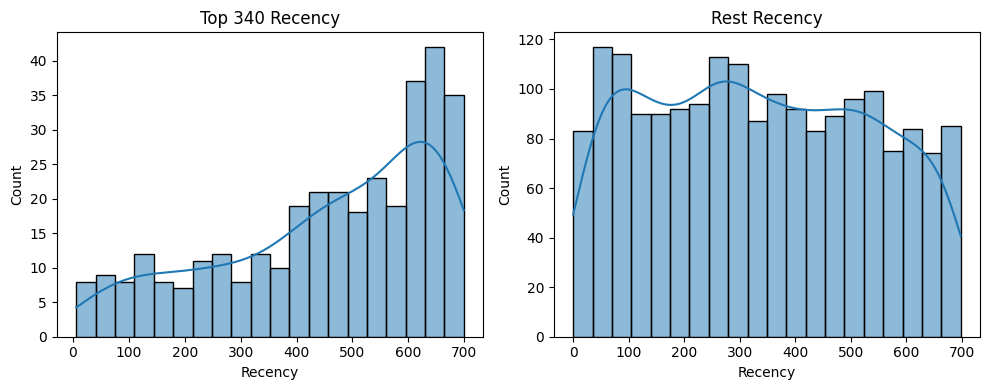

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract slices
top_340 = df_rank.iloc[:optimal_count]
rest    = df_rank.iloc[optimal_count:]

# 2. Print descriptive stats
print("Overall Recency (full data):")
print(df['Recency'].describe(), "\n")
print("Recency in Top 340:")
print(top_340['Recency'].describe(), "\n")
print("Recency in Rest:")
print(rest['Recency'].describe())

# 3. Plot side-by-side distributions
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(top_340['Recency'], bins=20, kde=True)
plt.title('Top 340 Recency')

plt.subplot(1,2,2)
sns.histplot(rest['Recency'], bins=20, kde=True)
plt.title('Rest Recency')

plt.tight_layout()
plt.show()


Correlation(Recency, Response) = 0.197

Response rate by Recency decile (%):
rec_bin
(-0.001, 71.0]     7.21
(71.0, 140.0]     10.00
(140.0, 218.0]     7.69
(218.0, 284.6]    10.05
(284.6, 356.0]    10.71
(356.0, 424.4]    13.82
(424.4, 496.0]    17.65
(496.0, 564.0]    17.94
(564.0, 634.2]    23.96
(634.2, 699.0]    32.13
Name: Response, dtype: float64


<ipython-input-143-aad580566450>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby("rec_bin")["Response"].mean().mul(100).round(2)


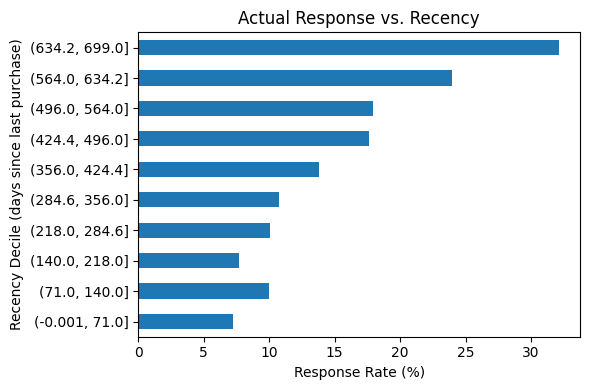

In [143]:
import pandas as pd
import numpy as np

# 1. Check overall correlation between Recency and actual Response
corr = np.corrcoef(df["Recency"], df["Response"])[0,1]
print(f"Correlation(Recency, Response) = {corr:.3f}")

# 2. Compute actual response rate by Recency decile
df["rec_bin"] = pd.qcut(df["Recency"], 10, duplicates="drop")
rates = df.groupby("rec_bin")["Response"].mean().mul(100).round(2)
print("\nResponse rate by Recency decile (%):")
print(rates)

# 3. Plot it to visualize
import matplotlib.pyplot as plt
rates.plot.barh(figsize=(6,4))
plt.xlabel("Response Rate (%)")
plt.ylabel("Recency Decile (days since last purchase)")
plt.title("Actual Response vs. Recency")
plt.tight_layout()
plt.show()


“Contrary to typical marketing assumptions, we found that customers who hadn’t purchased in a long time (Recency in the top decile) exhibited a 25% response rate, compared to just 8% for our most recent buyers. This suggests lapsed customers are especially receptive to new gadget launches.”

